In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
from py_files.data_loader import *
from implementations import *

This notebook is divided into 4 different sections:
1. Data Loading
2. Data visualization
3. Data processing
4. Model selections

# 1. Data loading

Data are loaded into a pandas.Dataframe, suitable for data visualization, and 3 numpy.array variables, one for the ids, one for the predictions and the last one for the features.

In [3]:
ids, predictions, data = load_data("train.csv")
perc = np.count_nonzero(predictions) / len(predictions)
print("The percentage of Boson events in this set is: ", perc * 100)

The percentage of Boson events in this set is:  34.266799999999996


In [4]:
train_df = load_dataframe("train.csv")

In [5]:
train_df.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


# 2. Data visualization

To visualize our features and their respective distribution, histograms and boxplots of the variables are plotted. The dataset is further explored by creating scatter plots of 2 given features and selecting the color of the dots according to the type of signal.

In [6]:
from py_files.plots import *

In [7]:
train_df.isna().sum() # We check if there are missing values (NA)

Id                             0
Prediction                     0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_su

In [8]:
(train_df == -999).sum() # We can visualize the undifined values (equal to -999) 

Id                                  0
Prediction                          0
DER_mass_MMC                    38114
DER_mass_transverse_met_lep         0
DER_mass_vis                        0
DER_pt_h                            0
DER_deltaeta_jet_jet           177457
DER_mass_jet_jet               177457
DER_prodeta_jet_jet            177457
DER_deltar_tau_lep                  0
DER_pt_tot                          0
DER_sum_pt                          0
DER_pt_ratio_lep_tau                0
DER_met_phi_centrality              0
DER_lep_eta_centrality         177457
PRI_tau_pt                          0
PRI_tau_eta                         0
PRI_tau_phi                         0
PRI_lep_pt                          0
PRI_lep_eta                         0
PRI_lep_phi                         0
PRI_met                             0
PRI_met_phi                         0
PRI_met_sumet                       0
PRI_jet_num                         0
PRI_jet_leading_pt              99913
PRI_jet_lead

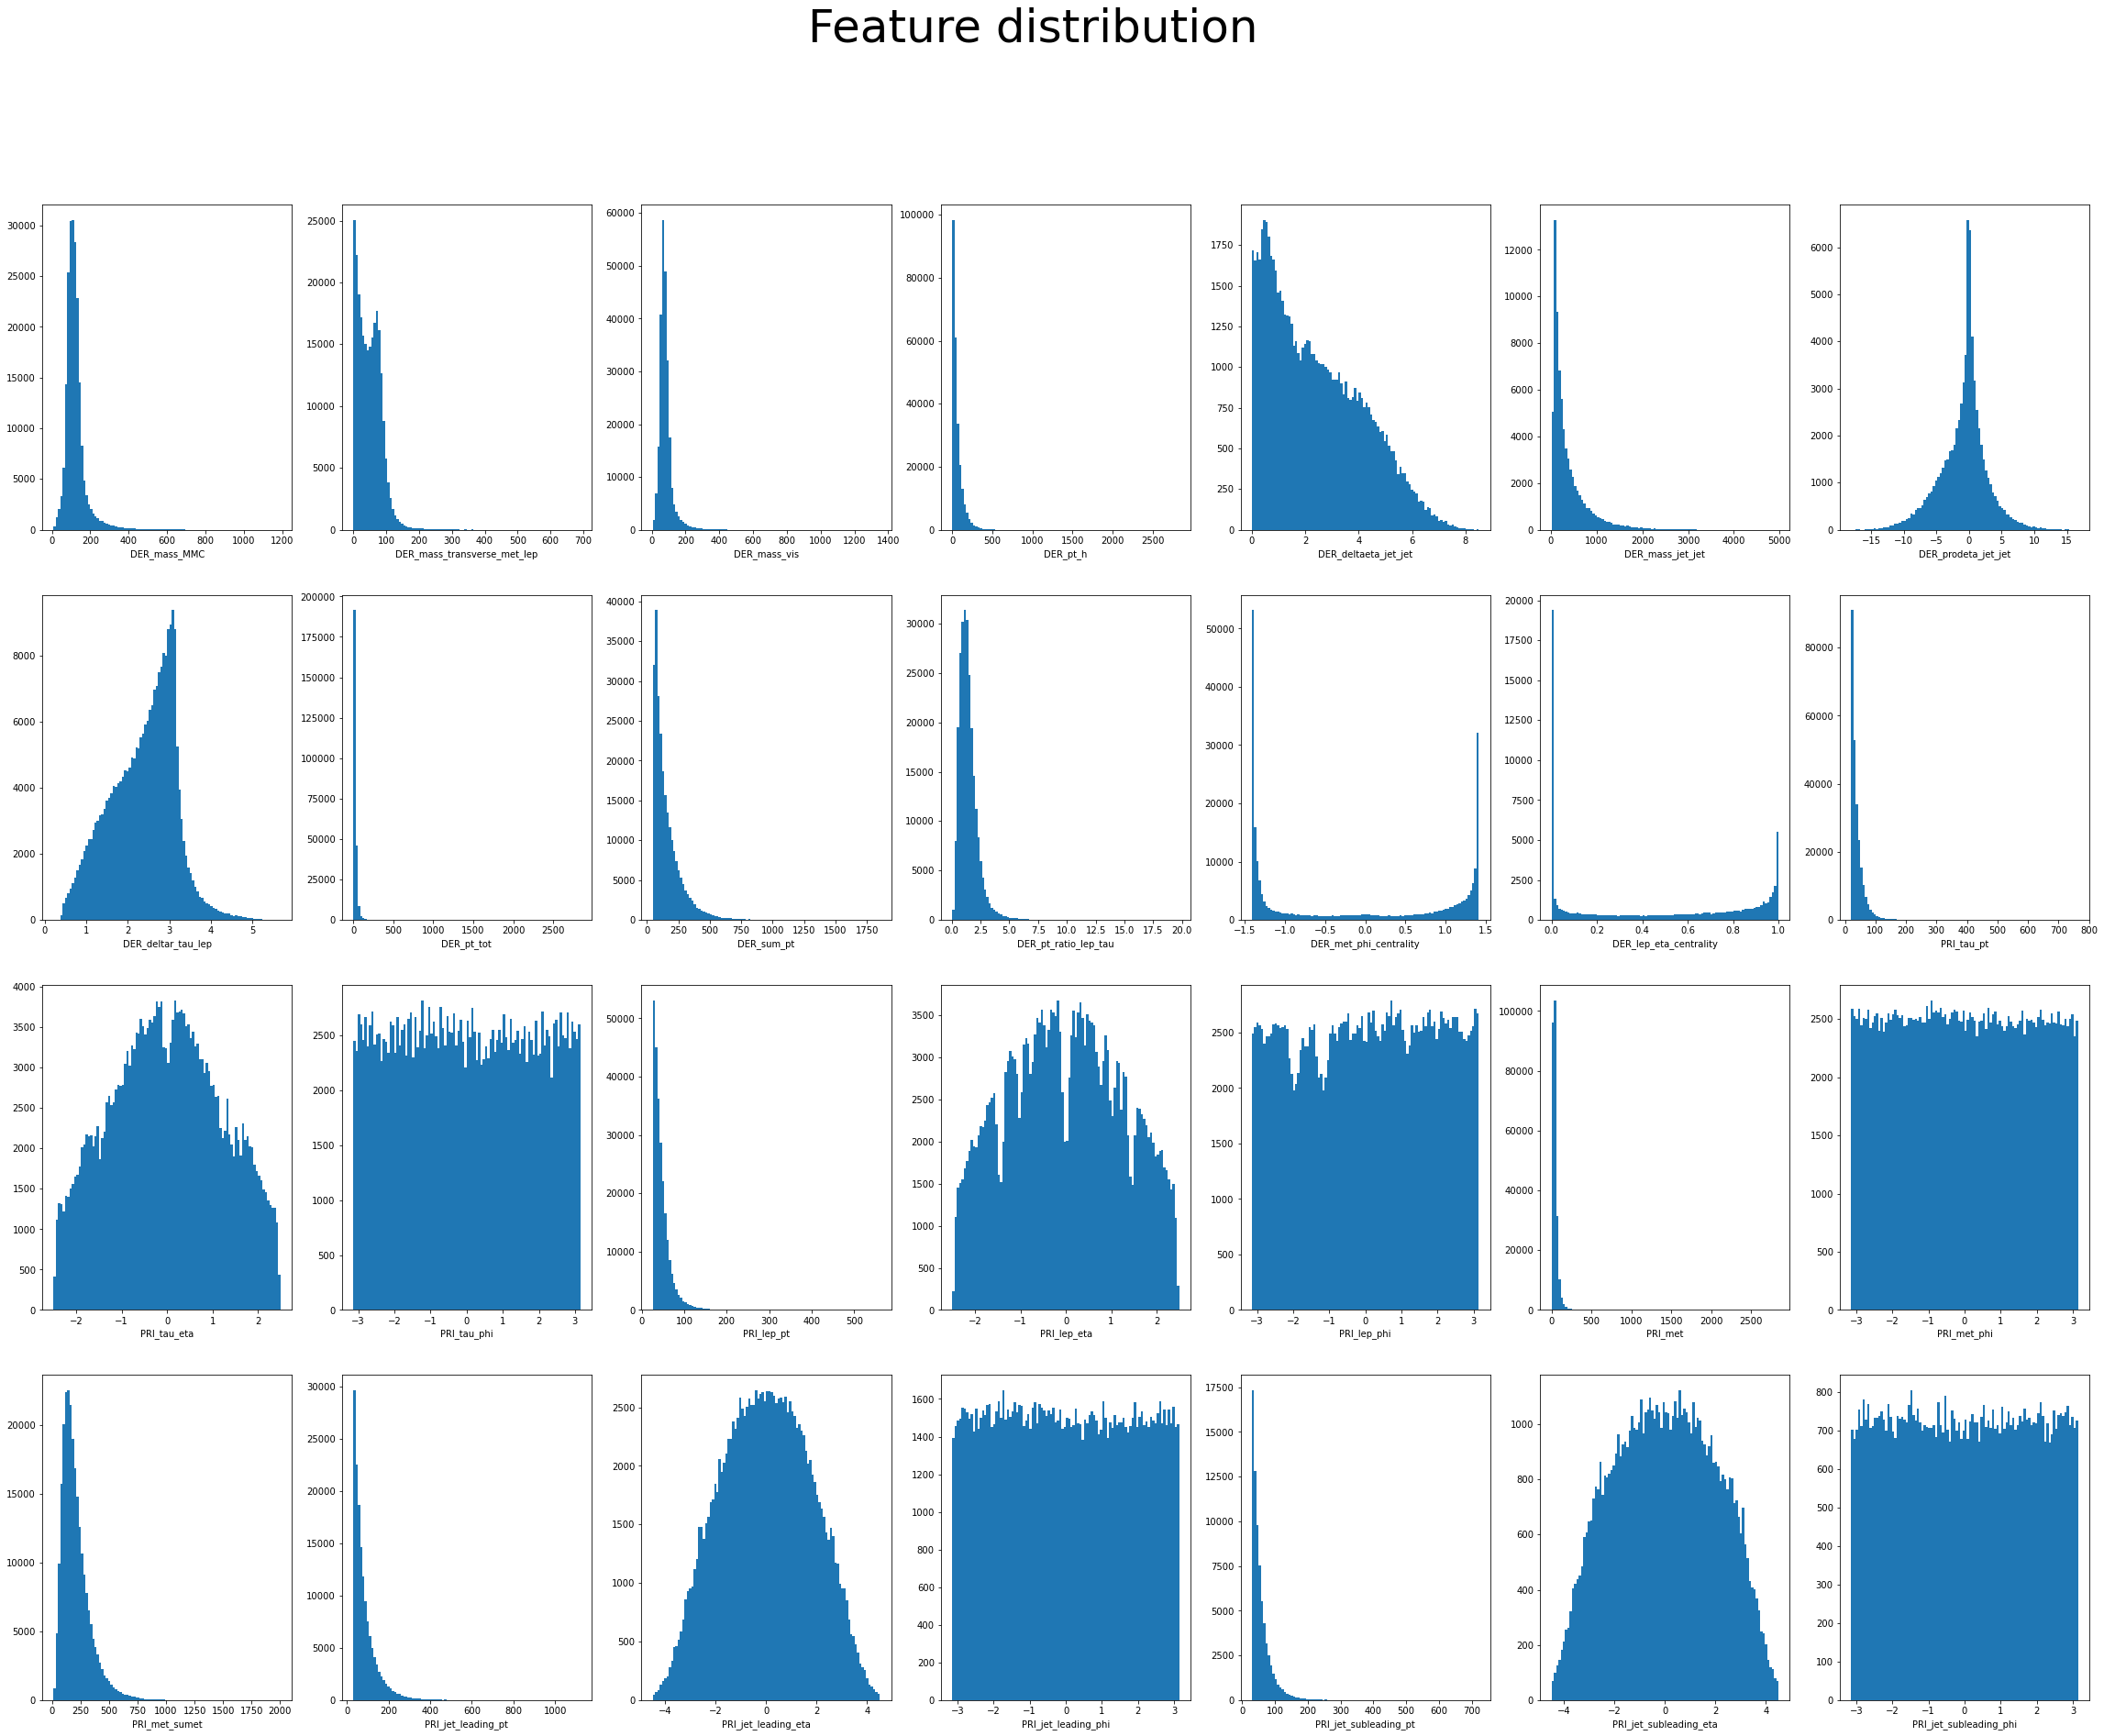

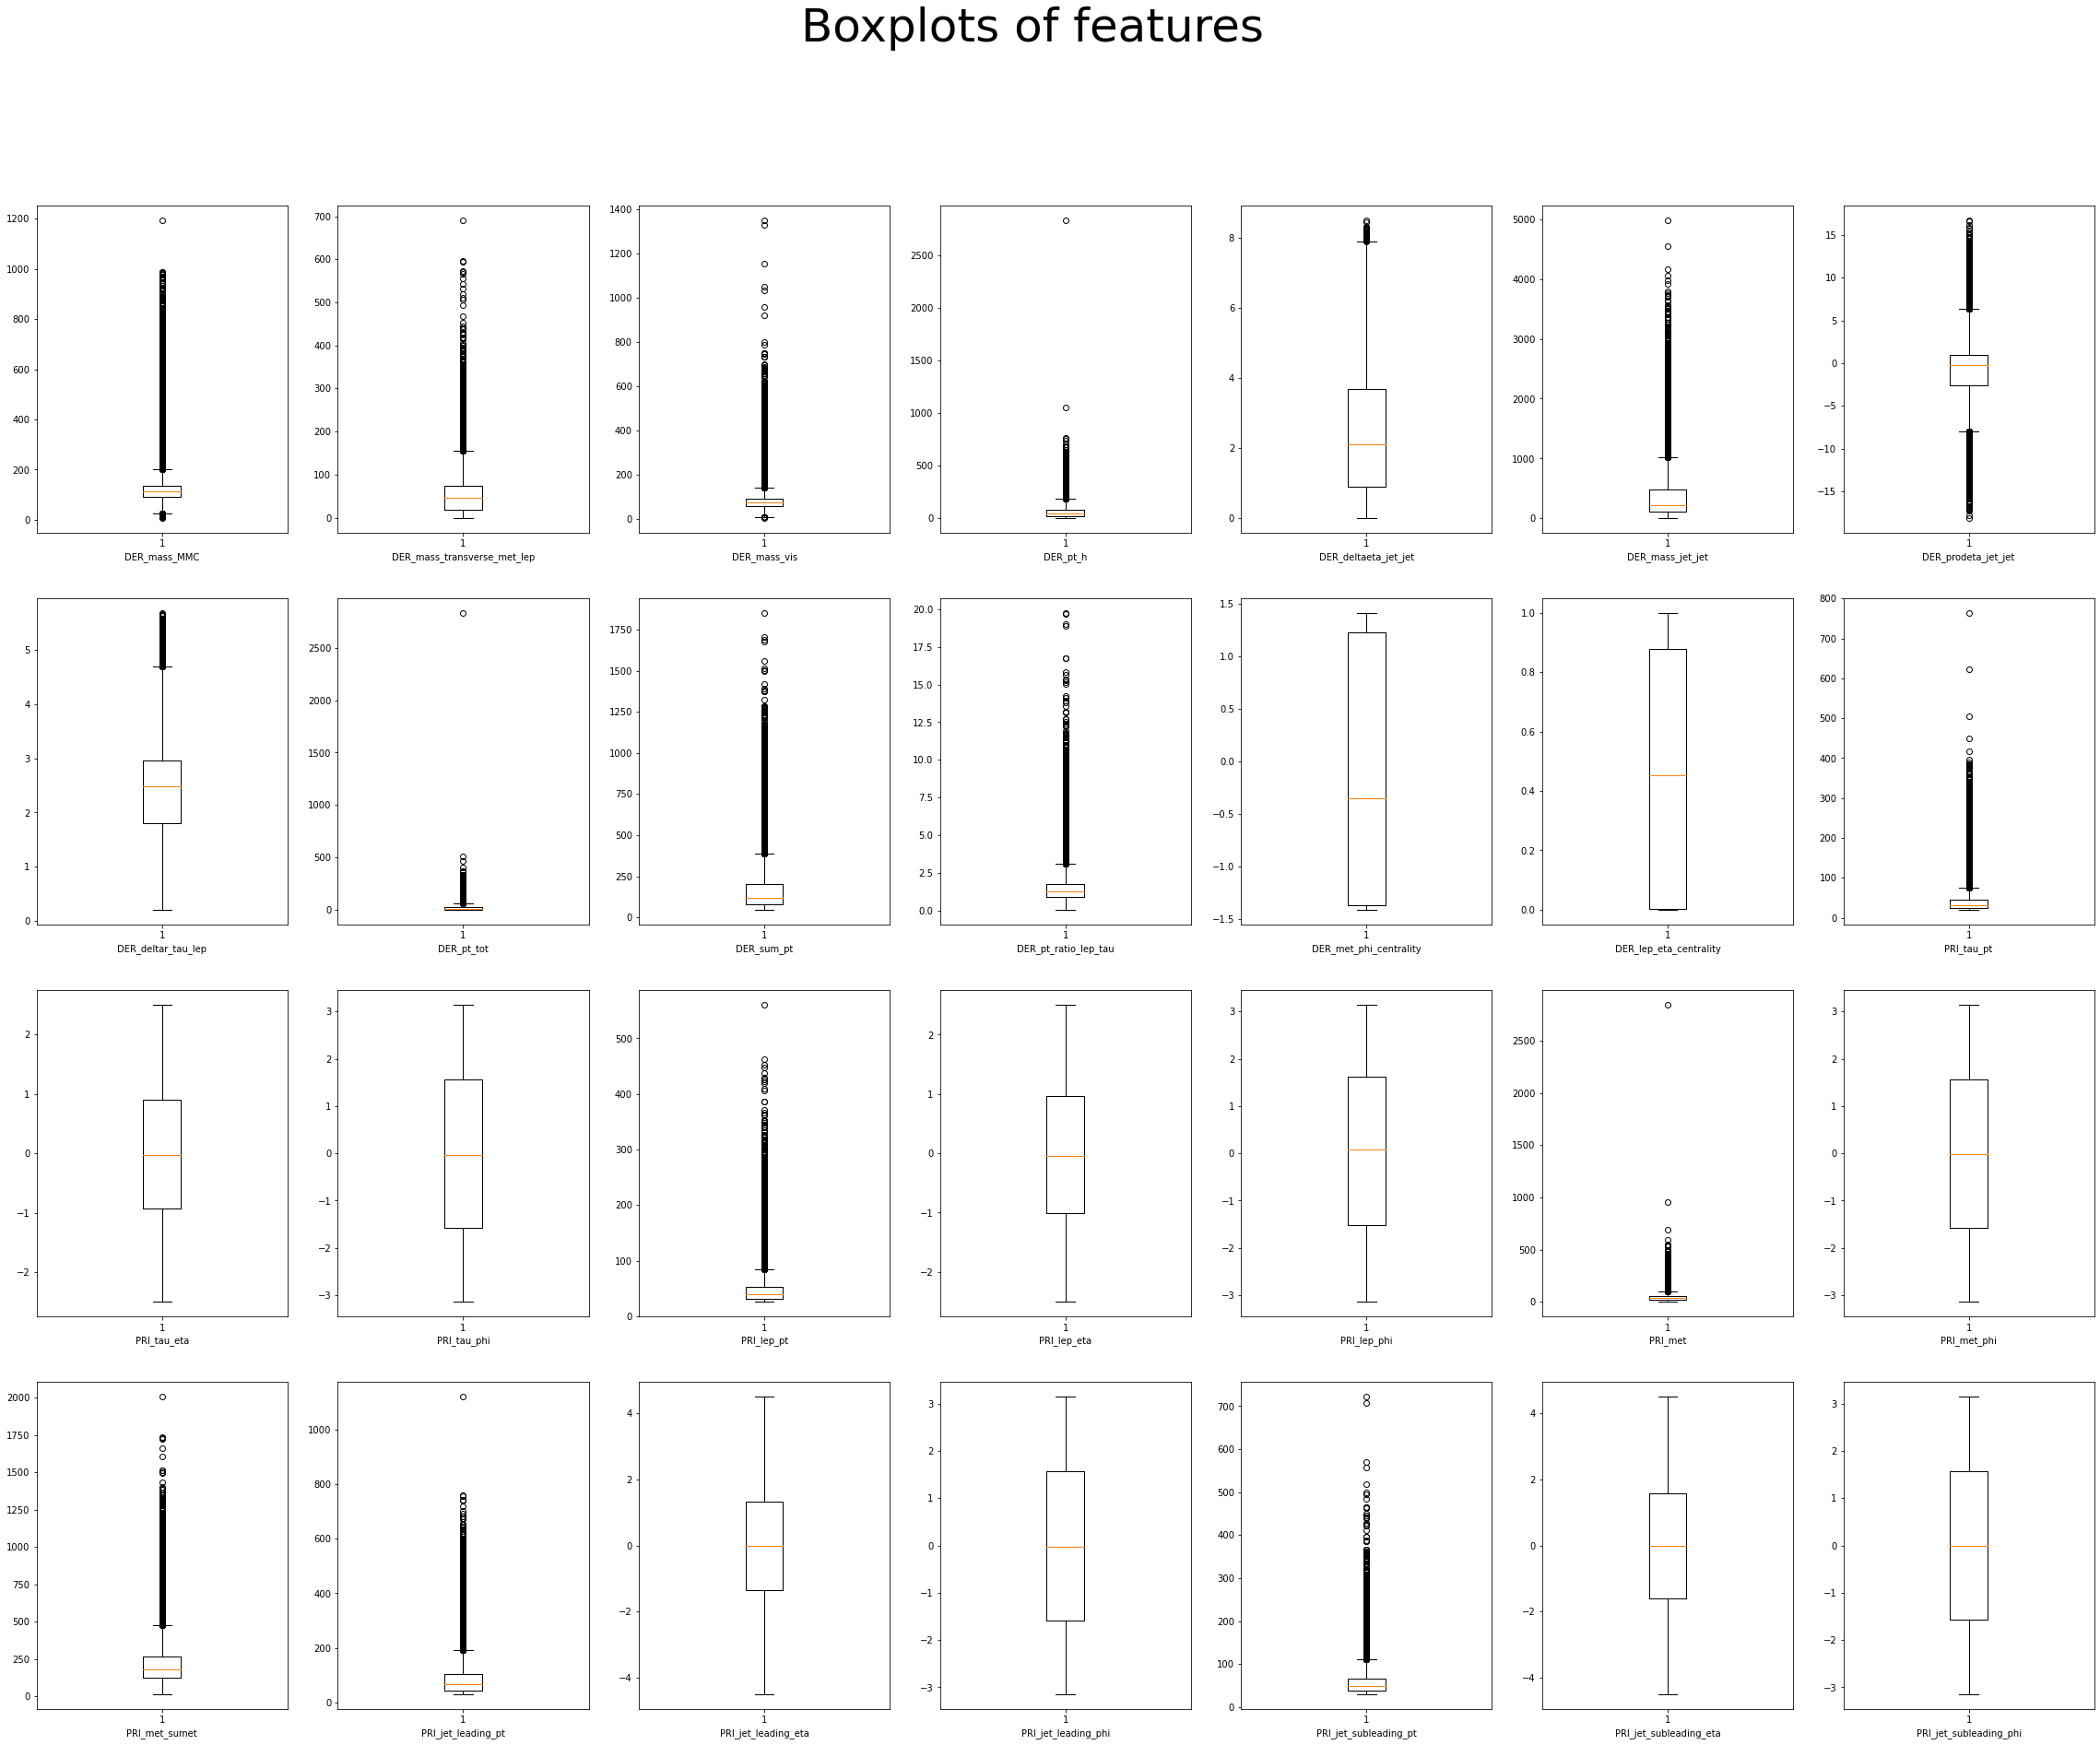

In [9]:
plots_distribution_boxplots(
    list(
        train_df.drop(
            ["Id", "Prediction", "PRI_jet_all_pt", "PRI_jet_num"], axis=1
        ).columns
    ),
    train_df,
)

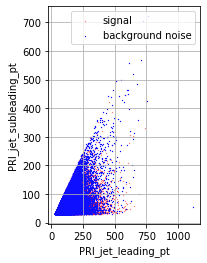

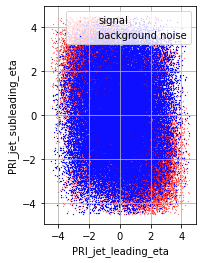

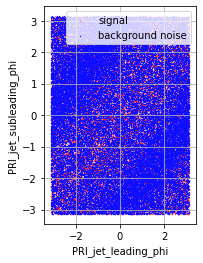

In [10]:
Features_1 = ["PRI_jet_leading_pt", "PRI_jet_leading_eta", "PRI_jet_leading_phi"]
Features_2 = [
    "PRI_jet_subleading_pt",
    "PRI_jet_subleading_eta",
    "PRI_jet_subleading_phi",
]
for feature_1, feature_2 in zip(Features_1, Features_2):
    features_visualization(feature_1, feature_2, train_df)

# 3. Data processing

The first step of data processing involves the identification of potential categorical or discrete features (here PRI_JET_NUM, the 22th. feature in the data array) and the application of one-hot encoding. In the second step, outliers values were identified and replaced with the median of the feature distribution and a binary variable representing samples containing the outliers for a defined feature was added, under the hypothesis that outliers might be significant for the type of event. Likewise, undefined values (equal to -999) were replaced with the median. Before normalizing our continuous features, our processed data underwent polynomial of degree 2 feature expansion.

In [11]:
from py_files.data_processing import *

In [12]:
processed_data = data

In [13]:
processed_data = one_hot_encoding(processed_data)
processed_data = handle_outliers(processed_data)
processed_data = handle_undefined_values(processed_data)
processed_data = polynomial_2(processed_data)
processed_data = standardize(processed_data)
processed_data = ones_concatenate(processed_data)

# 4. Model selection

Before training the 6 models, the dataset is split into a training and a test set. The test dataset will not be used for training but for estimating the generalization error defined by the cost function used by the model: accuracy of the predictions on the test dataset is also assessed. For models requiring hyperparameter tuning (ridge regression and regularized logistic regression),  4-fold cross-validation is performed on our training dataset to find the best hyperparameter lambda.

In [14]:
ratio = 0.9
k_fold = 4
seed = 1

In [15]:
preds_train, train, preds_test, test = split_data(
    processed_data, predictions, ratio, seed
)
# Here "test" does not refer to the test.csv, but to the fold used for testing (for methods that do not require a hyperparameter; otherwise an iteration
# (cross validation) will be used)

In [16]:
def accuracy_linear_regression(w, test, preds_test):
    prob = np.where(test.dot(w) >= 0.5, 1, 0)
    return np.mean(np.where(prob == preds_test, 1, 0))

In [17]:
def accuracy_logistic_regression(w, test, preds_test):
    prob = np.where(sigmoid(test.dot(w)) >= 0.5, 1, 0)
    return np.mean(np.where(prob == preds_test, 1, 0))

## 4.1 Least squares with gradient descent

In [18]:
max_iters = 10000
initial_w = np.zeros(processed_data.shape[1])
gamma = 0.01

w_opt_gd, train_loss_gd = mean_squared_error_gd(
    preds_train, train, initial_w, max_iters, gamma
)
test_loss_gd = compute_MSE(preds_test, test, w_opt_gd)

In [19]:
train_loss_gd, test_loss_gd, accuracy_linear_regression(w_opt_gd, test, preds_test)

(0.084122800051917, 0.08477206013316672, 0.74136)

In [20]:
%store w_opt_gd

Stored 'w_opt_gd' (ndarray)


## 4.2 Least squares with stochastic gradient descent

In [21]:
max_iters = 10000
initial_w = np.zeros(processed_data.shape[1])
gamma = 0.0001

w_opt_sgd, train_loss_sgd = mean_squared_error_sgd(
    preds_train, train, initial_w, max_iters, gamma
)
test_loss_sgd = compute_MSE(preds_test, test, w_opt_sgd)

In [22]:
train_loss_sgd, test_loss_sgd, accuracy_linear_regression(w_opt_sgd, test, preds_test)

(0.0948252525623822, 0.0957096513248188, 0.6974)

In [23]:
%store w_opt_sgd

Stored 'w_opt_sgd' (ndarray)


## 4.3 Least squares with normal equations

In [24]:
# We will compute the MSE loss train_loss_ne and the optimal weights w_train_ne using
# the normal equations -> solution in closed form

w_opt_ne, train_loss_ne = least_squares(preds_train, train)
test_loss_ne = compute_MSE(preds_test, test, w_opt_ne)

In [25]:
train_loss_ne, test_loss_ne, accuracy_linear_regression(w_opt_ne, test, preds_test)

(0.07287774920346746, 0.07352941531570018, 0.80148)

In [26]:
%store w_opt_ne

Stored 'w_opt_ne' (ndarray)


## 4.4 Ridge regression with normal equations

In [46]:
lambdas = np.logspace(-15, -14, 20)

k_indices = build_k_indices(preds_train, k_fold, seed)
loss_tr_ridge = []
loss_te_ridge = []
for lambda_ in lambdas:
    loss_tr_tmp = []
    loss_te_tmp = []
    for k in range(k_fold):
        (
            test_predictions,
            test_data,
            training_predictions,
            training_data,
        ) = cross_validation(preds_train, train, k_indices, k)
        w_opt, training_loss = ridge_regression(
            training_predictions, training_data, lambda_
        )
        test_loss = compute_MSE(test_predictions, test_data, w_opt)
        loss_tr_tmp.append(training_loss)
        loss_te_tmp.append(test_loss)
    loss_tr_ridge.append(np.mean(loss_tr_tmp))
    loss_te_ridge.append(np.mean(loss_te_tmp))
lambda_opt_ridge = lambdas[np.argmin(loss_te_ridge)]

# After the cross validation, which has led to lambda_opt_ridge,
# we compute the optimal weights and the consequent loss using the train set splitted in 2

w_opt_ridge, train_loss_ridge = ridge_regression(preds_train, train, lambda_opt_ridge)
test_loss_ridge = compute_MSE(preds_test, test, w_opt_ridge)

In [47]:
train_loss_ridge, test_loss_ridge, accuracy_linear_regression(
    w_opt_ridge, test, preds_test
)

(0.0728777513524431, 0.07352935882644926, 0.80148)

In [48]:
%store w_opt_ridge

Stored 'w_opt_ridge' (ndarray)


In [49]:
lambda_opt_ridge

3.7926901907322535e-15

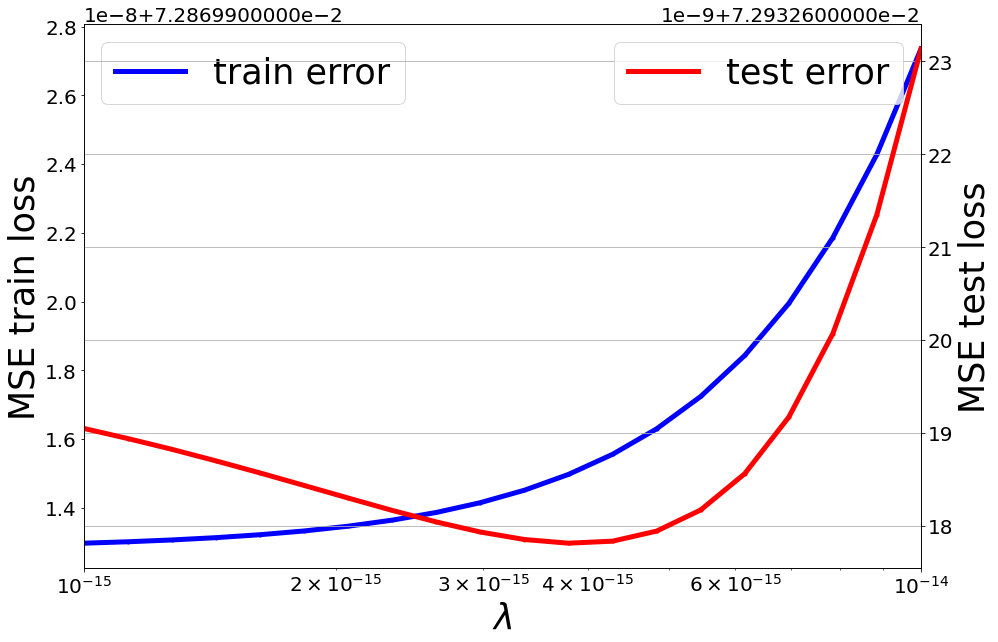

In [50]:

"""
fig, ax = plt.subplots(figsize=(15, 10))
ax.semilogx(lambdas, loss_tr_ridge, marker=".", color="b", label="train error")
ax.set_xlabel("$\lambda$")
ax.set_ylabel("MSE train loss")
ax2 = ax.twinx()
ax2.semilogx(lambdas, loss_te_ridge, marker=".", color="r", label="test error")
ax2.set_ylabel("MSE test loss")
ax.legend(loc="best")
ax2.legend(loc="upper left")
# ax2.set_ylim(-1e-9+7.3e-2, 8e-9+7.3e-2)
plt.xlim(1e-15, 1e-14)
plt.title("Ridge regression with normal equations: MSE training and test losses")
plt.savefig("imgs/ridge_regression_ne_test.png")
plt.show()
"""

SMALL_SIZE = 20
MEDIUM_SIZE = 35
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, ax = plt.subplots(figsize=(15, 10))
ax.semilogx(lambdas, loss_tr_ridge, marker=".", color="b", label="train error", linewidth = 5)
ax.set_xlabel("$\lambda$")
ax.set_ylabel("MSE train loss")
ax2 = ax.twinx()
ax2.semilogx(lambdas, loss_te_ridge, marker=".", color="r", label="test error", linewidth = 5)
ax2.set_ylabel("MSE test loss")
ax.legend(loc="upper left")
plt.grid()
ax2.legend(loc="upper right")
# ax2.set_ylim(-1e-9+7.3e-2, 8e-9+7.3e-2)
plt.xlim(1e-15, 1e-14)
# plt.title("Ridge regression with normal equations: MSE training and test losses")
plt.savefig("imgs/ridge_regression_ne_test.png")
plt.show()

## 4.5 Logistic regression with gradient descent

In [32]:
max_iters = 10000
initial_w = np.zeros(processed_data.shape[1])
gamma = 0.2

w_opt_lr, train_loss_lr = logistic_regression(
    preds_train, train, initial_w, max_iters, gamma
)
test_loss_lr = compute_log_loss(preds_test, test, w_opt_lr)

In [33]:
train_loss_lr, test_loss_lr, accuracy_logistic_regression(w_opt_lr, test, preds_test)

(0.5097757789873425, 0.5139721643012374, 0.73444)

In [34]:
%store w_opt_lr

Stored 'w_opt_lr' (ndarray)


## 4.6 Regularized logistic regression with gradient descent

In [35]:
max_iters = 10000
initial_w = np.zeros(processed_data.shape[1])
gamma = 0.2
lambdas = np.linspace(0,1,10)

k_indices = build_k_indices(preds_train, k_fold, seed)
loss_tr_rlr = []
loss_te_rlr = []
for lambda_ in lambdas:
    loss_tr_tmp = []
    loss_te_tmp = []
    for k in range(k_fold):
        (
            test_predictions,
            test_data,
            training_predictions,
            training_data,
        ) = cross_validation(preds_train, train, k_indices, k)
        w_opt, train_loss = reg_logistic_regression(
            training_predictions, training_data, lambda_, initial_w, max_iters, gamma
        )
        test_loss = compute_ridge_log_loss(test_predictions, test_data, w_opt, lambda_)
        loss_tr_tmp.append(train_loss)
        loss_te_tmp.append(test_loss)
    loss_tr_rlr.append(np.mean(loss_tr_tmp))
    loss_te_rlr.append(np.mean(loss_te_tmp))
lambda_opt_rlr = lambdas[np.argmin(loss_te_rlr)]
w_opt_rlr, train_loss_rlr = reg_logistic_regression(
    preds_train, train, lambda_opt_rlr, initial_w, max_iters, gamma
)

# After the cross validation, which has led to lambda_opt_rlr,
# we compute the optimal weights and the consequent loss using the train set splitted in 2

test_loss_rlr = compute_ridge_log_loss(preds_test, test, w_opt_rlr, lambda_opt_rlr)

In [36]:
train_loss_rlr, test_loss_rlr, accuracy_logistic_regression(w_opt_rlr, test, preds_test)

(0.5097757789873425, 0.5139721643012374, 0.73444)

In [37]:
%store w_opt_rlr

Stored 'w_opt_rlr' (ndarray)


In [38]:
lambda_opt_rlr

0.0

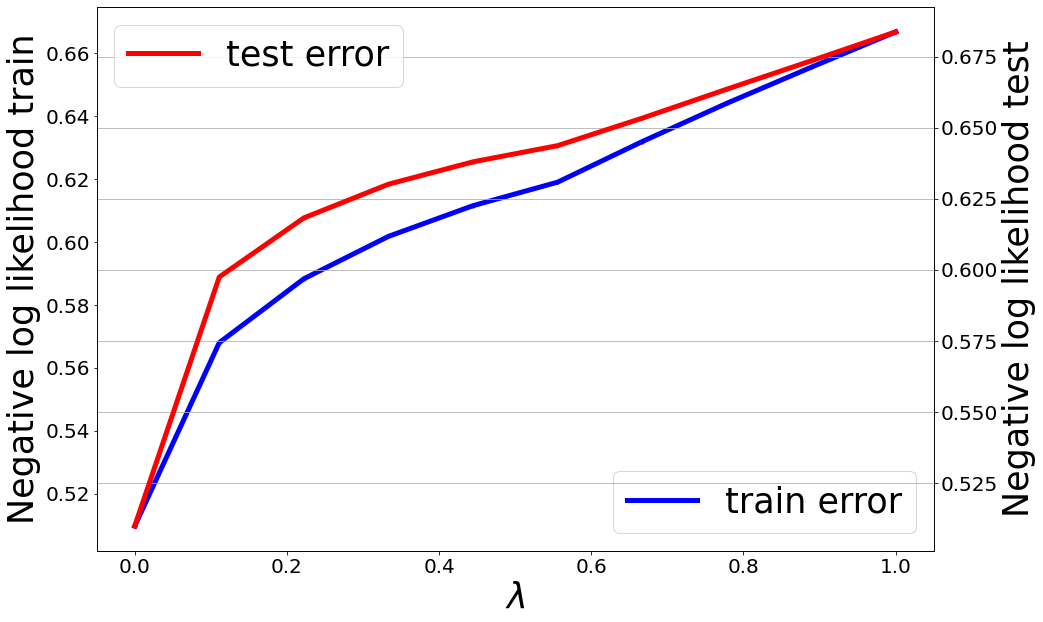

In [44]:
SMALL_SIZE = 20
MEDIUM_SIZE = 35
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(lambdas, loss_tr_rlr, marker=".", color="b", label="train error", linewidth = 5)
ax.set_xlabel("$\lambda$")
ax.set_ylabel("Negative log likelihood train")
ax2 = ax.twinx()
ax2.plot(lambdas, loss_te_rlr, marker=".", color="r", label="test error", linewidth = 5)
ax2.set_ylabel("Negative log likelihood test")
#plt.title(
#    "Regularized logistic regression: Negative log likelihood for training and test"
#)
ax.legend(loc="lower right")
ax2.legend(loc="upper left")
plt.grid()
plt.savefig("imgs/reg_log_regression_test.png")
plt.show()